<font size=6>http://tinyurl.com/yc3563kh</font>

import and pip install

In [1]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=59465a54c297b7ce263f7d92b51a28c1caca9be45700a9589f026756b8bc7ce9
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [2]:
!git clone https://github.com/kedtiwerasak/sentiment_data.git

Cloning into 'sentiment_data'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 1.85 MiB | 9.87 MiB/s, done.


In [3]:
import numpy as np
import pandas as pd
import json, nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import arff
import codecs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

Read flie and Test read data

In [4]:
filename = 'sentiment_data/labelled.arff'
with codecs.open(filename, 'r', encoding='utf8',errors="ignore") as f:
    text = f.read()

In [5]:
with open('sentiment_data/contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [6]:
data = arff.load(text)
cols = [att[0] for att in data['attributes']]
df = pd.DataFrame(data=data['data'], columns=cols)
print(df.head())

        Twitter                                               body class
0  1.229709e+09  anyone feel motivated the fri afternoon prior ...   pos
1  1.231218e+09  I had the same issue with dominions site. Fixe...   neg
2  1.229064e+09  Screw that, apparently we're off to the carver...   neg
3  1.229699e+09   seriously, do you have to rub it in maggie!!!!     pos
4  1.230690e+09  if i'm not wrong.. Alt is when image can't be ...   pos


In [7]:
data = arff.load(text)
data['attributes']

[('Twitter', 'NUMERIC'), ('body', 'STRING'), ('class', ['pos', 'neg'])]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49955 entries, 0 to 49954
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Twitter  49955 non-null  float64
 1   body     49955 non-null  object 
 2   class    49955 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [9]:
# name column change to use
body = df.columns.values[1]
sentiment = df.columns.values[2]
body, sentiment

('body', 'class')

some algorithm by Gunjan933

In [10]:
def processbody (body):
     # all string to lower
    body = body.lower()
    # removename
    body = re.sub('@[^\s]+', '', body)
    # remove URL
    body = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', body)
    # removes digits
    body = re.sub(r"\d+", " ", str(body))
    # remove (&quot;)
    body = re.sub('&quot;'," ", body)
    # removes all single characters
    body = re.sub(r"\b[a-zA-Z]\b", "", str(body))
    # replace word in body to word of file ( Example :  we're = we are)
    for word in body.split():
        if word.lower() in contractions:
            body = body.replace(word, contractions[word.lower()])
    # removes punctuations
    body = re.sub(r"[^\w\s]", " ", str(body))
    # convert more than 2 letter repetitions to 2 letter
    body = re.sub(r'(.)\1+', r'\1\1', body)
    # replaces double spaces with single space
    body = re.sub(r"\s+", " ", str(body))
    return body

check algorithm

In [11]:
df['processed_tweet'] = np.vectorize(processbody)(df[body])
df.head(5)

,Twitter,body,class,processed_tweet
0,1.229709e+09,anyone feel motivated the fri afternoon prior ...,pos,anyone feel motivated the fri afternoon prior ...
1,1.231218e+09,I had the same issue with dominions site. Fixe...,neg,had the same issue with dominions site fixed ...
2,1.229064e+09,"Screw that, apparently we're off to the carver...",neg,screw that apparently we are off to the carver...
3,1.229699e+09,"seriously, do you have to rub it in maggie!!!!",pos,seriously do you have to rub it in maggie
4,1.230690e+09,if i'm not wrong.. Alt is when image can't be ...,pos,if not wrong alt is when image can be displaye...


In [12]:
# Unigram and Bigram
count_vectorizer = CountVectorizer(ngram_range=(1,2))
final_vectorized_data = count_vectorizer.fit_transform(df['processed_tweet'])
final_vectorized_data

<49955x291008 sparse matrix of type '<class 'numpy.int64'>'
	with 1124845 stored elements in Compressed Sparse Row format>

In [13]:
# define train test
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df[sentiment],
                                                    test_size=0.5, random_state=69)

In [14]:
# shape of each data
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (24977, 291008)
X_test_shape :  (24978, 291008)
y_train_shape :  (24977,)
y_test_shape :  (24978,)


In [15]:
# Naive Bayes Classifier
model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

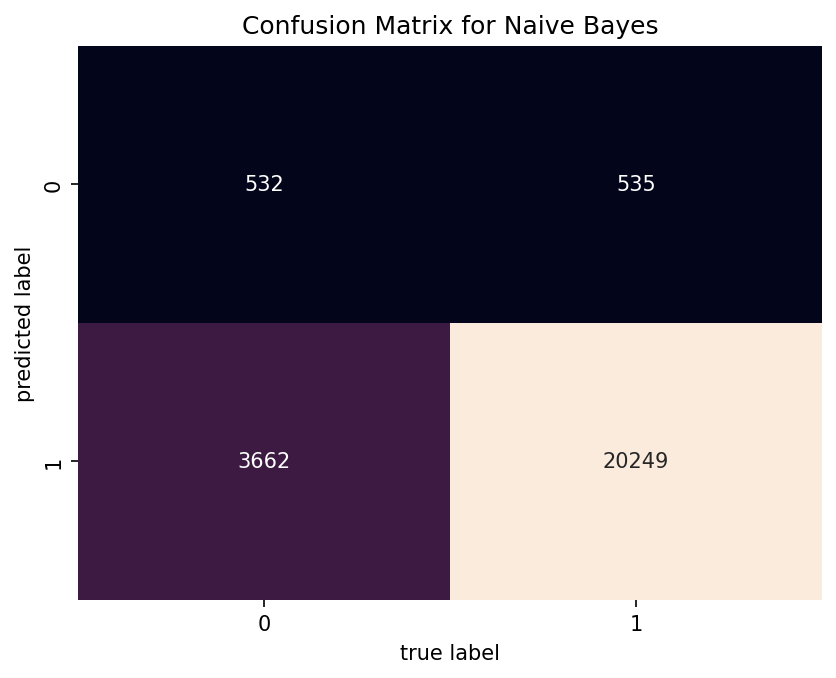

In [23]:
# show matrix
plt.figure(dpi=150)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [17]:
# check accuracy
score_naive = accuracy_score(predicted_naive, y_test)
print("accuracy : ",score_naive)

accuracy :  0.8319721354792217


In [18]:
# print recall precision f1-score
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

         neg       0.50      0.13      0.20      4194
         pos       0.85      0.97      0.91     20784

    accuracy                           0.83     24978
   macro avg       0.67      0.55      0.55     24978
weighted avg       0.79      0.83      0.79     24978

